In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data_url="./Study_vs_Score_data.csv"
df = pd.read_csv(data_url)
df.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Attendance_Hours']], df['Final_Marks'], test_size=0.2, random_state=42)

In [35]:
X_train.head()

,Attendance_Hours
29,13.251529
535,76.133601
695,52.743403
557,12.014787
836,74.039213


In [36]:
y_train.head()

29     42.152728
535    71.507619
695    69.613104
557    44.495045
836    78.513371
Name: Final_Marks, dtype: float64

In [37]:
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def ridge_regression(X, y, lamda=1.00, epochs=1000, learning_rate=0.01):
    n, m = X.shape
    w = np.zeros(m)
    loss_history = []

    for epoch in range(epochs):
        y_pred = X.dot(w)
        loss = loss_function(y, y_pred)
        gradient = -2 * X.T.dot(y - y_pred) / n + 2 * lamda * w
        w -= learning_rate * gradient
        loss_history.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, loss_history


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
w, loss_history = ridge_regression(X_train_with_bias, y_train.values, lamda=0.1, epochs=1000000, learning_rate=0.00001)


Epoch 0, Loss: 4074.871003109034
Epoch 100, Loss: 317.83162969962586
Epoch 200, Loss: 317.4389365176687
Epoch 300, Loss: 317.2360396519468
Epoch 400, Loss: 317.033348802374
Epoch 500, Loss: 316.8308392464902
Epoch 600, Loss: 316.6285107004819
Epoch 700, Loss: 316.4263629877478
Epoch 800, Loss: 316.22439593261873
Epoch 900, Loss: 316.022609359612
Epoch 1000, Loss: 315.82100309342377
Epoch 1100, Loss: 315.6195769589309
Epoch 1200, Loss: 315.41833078118884
Epoch 1300, Loss: 315.2172643854327
Epoch 1400, Loss: 315.0163775970769
Epoch 1500, Loss: 314.8156702417143
Epoch 1600, Loss: 314.61514214511686
Epoch 1700, Loss: 314.4147931332348
Epoch 1800, Loss: 314.2146230321969
Epoch 1900, Loss: 314.01463166830996
Epoch 2000, Loss: 313.8148188680587
Epoch 2100, Loss: 313.6151844581059
Epoch 2200, Loss: 313.41572826529136
Epoch 2300, Loss: 313.2164501166329
Epoch 2400, Loss: 313.0173498393253
Epoch 2500, Loss: 312.81842726074024
Epoch 2600, Loss: 312.61968220842624
Epoch 2700, Loss: 312.42111451010

In [39]:
print("Weights:", w)

Weights: [37.8534609   0.54702183]


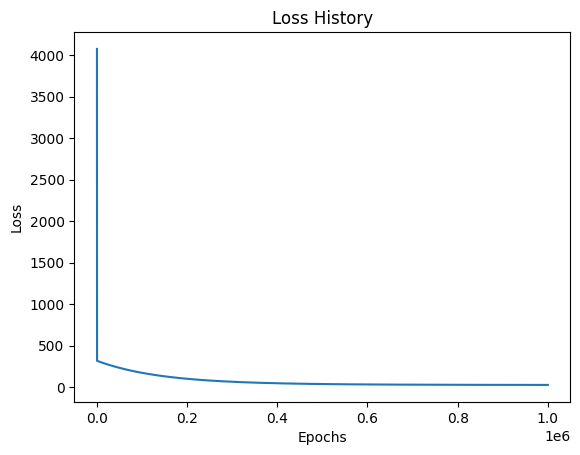

In [40]:
#plot loss history
def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

plot_loss_history(loss_history)


In [41]:
#caculate accuracy
X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred = X_test_with_bias.dot(w)

In [42]:

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 22.81
RMSE: 4.78
R² Score: 0.8120
